In [75]:
def plot_combined_closing_prices(file_names,column_name):
    # Create a figure to hold the plot
    plt.figure(figsize=(12, 6))

    # Iterate over the file names
    for i, file_name in enumerate(file_names):
        # Construct the file path
        file_path = '../data_updated/'+file_name

        # Read the file into a DataFrame
        dataset = pd.read_csv(file_path)
        dataset['Цена'] = dataset['Цена'] / dataset['Цена'].iloc[0]  # Normalize the prices

        # Preprocess the data
        dataset['Дата'] = pd.to_datetime(dataset['Дата'])
        # Plot the closing prices
        plt.plot(dataset['Дата'], dataset[column_name], label=f'{column_name} для акции "{file_name}"')

    # Set the title, labels, and legend
    plt.title(f'{column_name} для всех акций')
    plt.xlabel('Дата')
    plt.ylabel(f'{column_name}')
    plt.legend()

    # Show the plot
    plt.show()
def plot_closing_prices(file_names, column_name, plot_trend=True, plot_moving_average=True, trend_window_length=15, moving_avg_window=30):
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

    for i, file_name in enumerate(file_names):
        # Construct the file path
        file_path = '../data_updated/' + file_name

        # Read the file into a DataFrame
        dataset = pd.read_csv(file_path)
        dataset['Дата'] = pd.to_datetime(dataset['Дата'])

        # Plot the closing prices
        plt.figure(figsize=(12, 6))
        plt.plot(dataset['Дата'], dataset[column_name], label=f'{column_name} для акции {file_name}', color=colors[i % len(colors)])

        if plot_trend:
            # Calculate and plot trend line using Savitzky-Golay filter
            trend = savgol_filter(dataset[column_name], window_length=trend_window_length, polyorder=2)
            plt.plot(dataset['Дата'], trend, label=f'Trend for {column_name}', color='black', linestyle='--')

        if plot_moving_average:
            # Calculate and plot moving average
            moving_avg = dataset[column_name].rolling(window=moving_avg_window).mean()
            plt.plot(dataset['Дата'], moving_avg, label=f'{column_name} {moving_avg_window}-day MA', color='green', linestyle='--')

        plt.title(f'"{column_name}" для акции "{file_name}"')
        plt.xlabel('Дата')
        plt.ylabel(f'"{column_name}" закрытия')
        plt.legend()
        plt.show()


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# List of file names to process
file_names = [
    'Прошлые данные - LKOH.csv',
    'Прошлые данные - INGR.csv',
    'Прошлые данные - LENT.csv',
    'Прошлые данные - LSRG.csv',
    'Прошлые данные - MVID.csv',
    'Прошлые данные - NVTK.csv',
    'Прошлые данные - OZONDR.csv',
    'Прошлые данные - PIKK.csv',
    'Прошлые данные - ROSN.csv',
    'Прошлые данные - FIVEDR.csv',
    'Прошлые данные - SMLT.csv',
    'Прошлые данные - GAZP (3).csv'
]

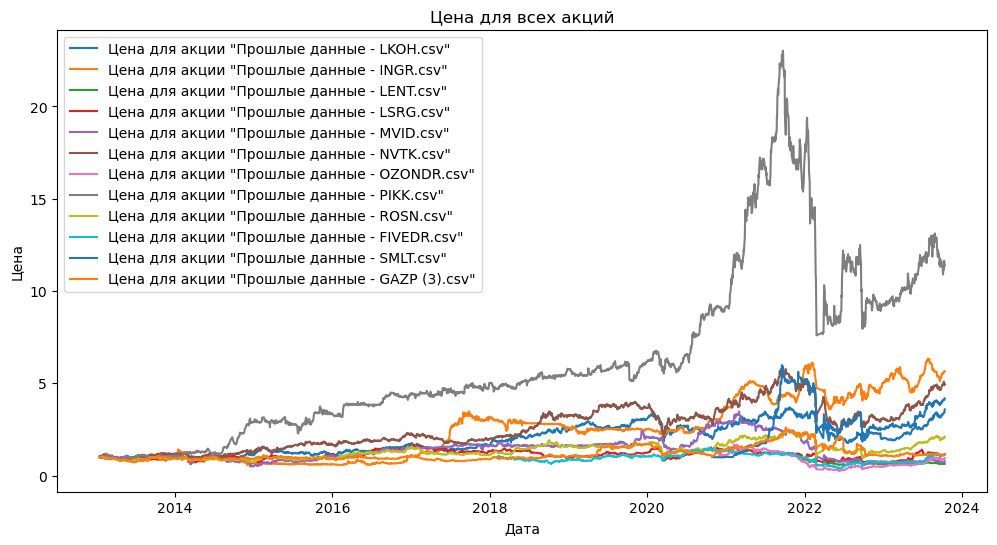

In [77]:
plot_combined_closing_prices(file_names,column_name='Цена')

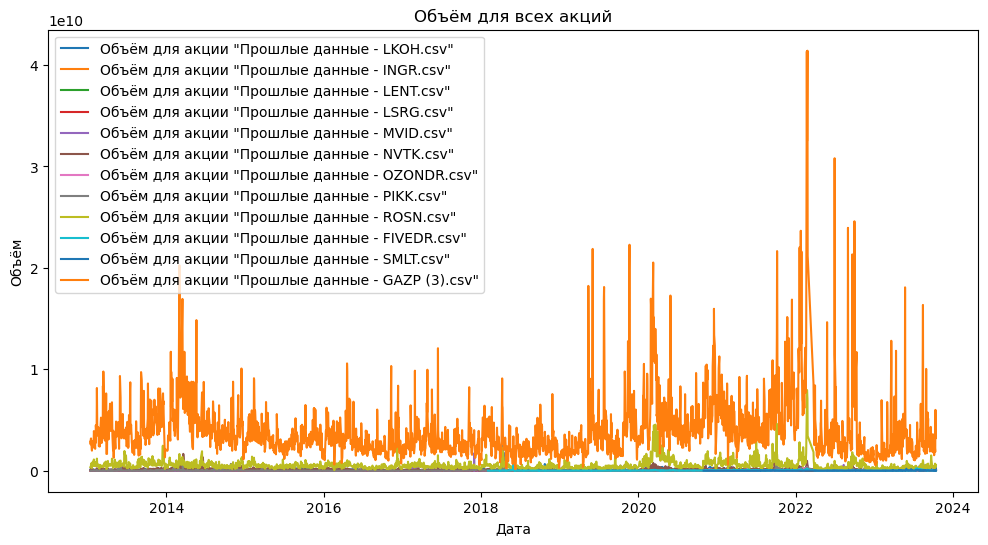

In [79]:
plot_combined_closing_prices(file_names,column_name='Объём')

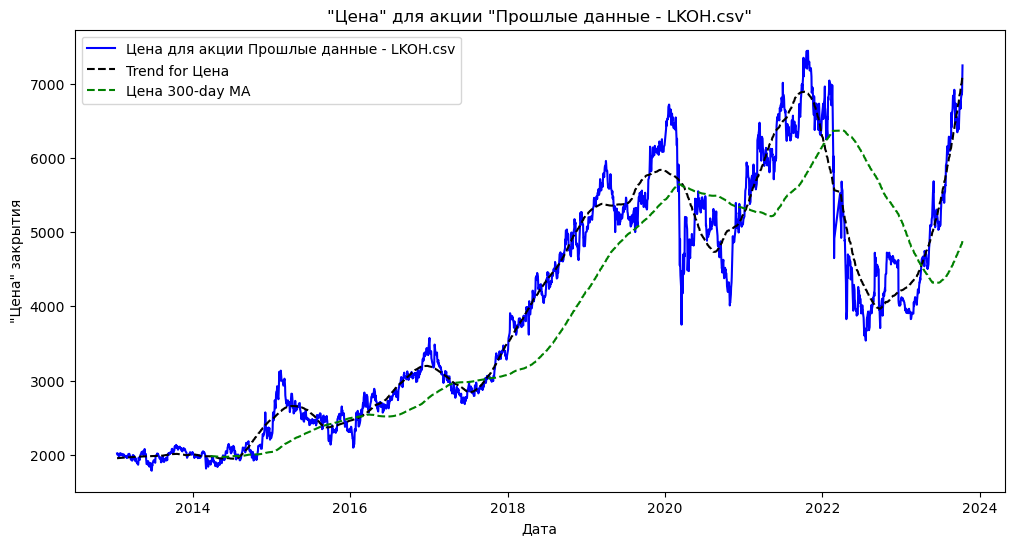

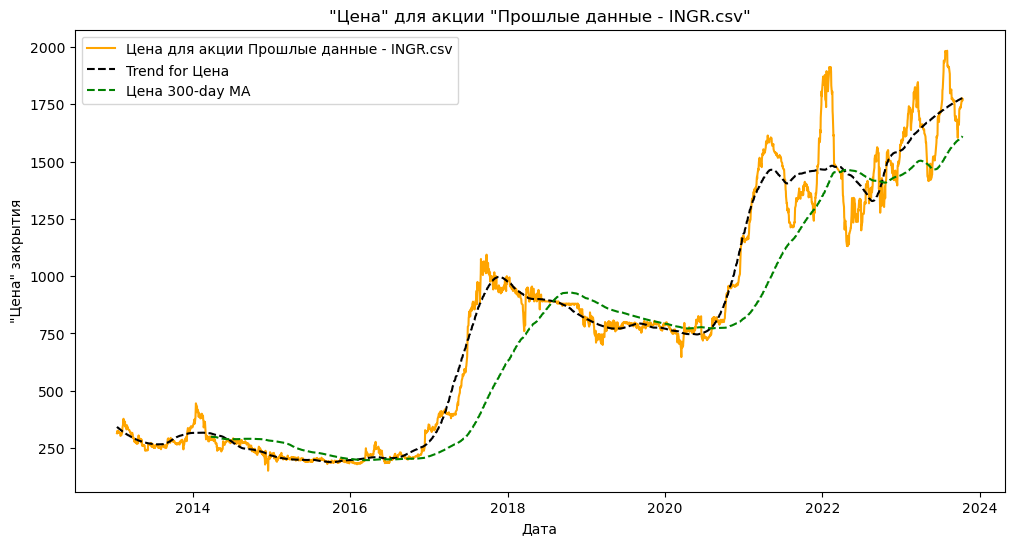

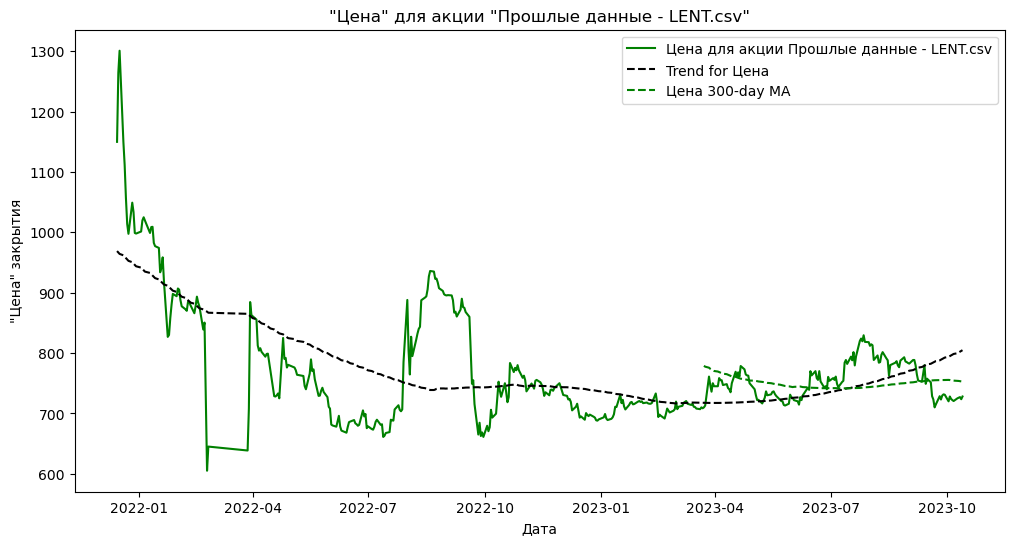

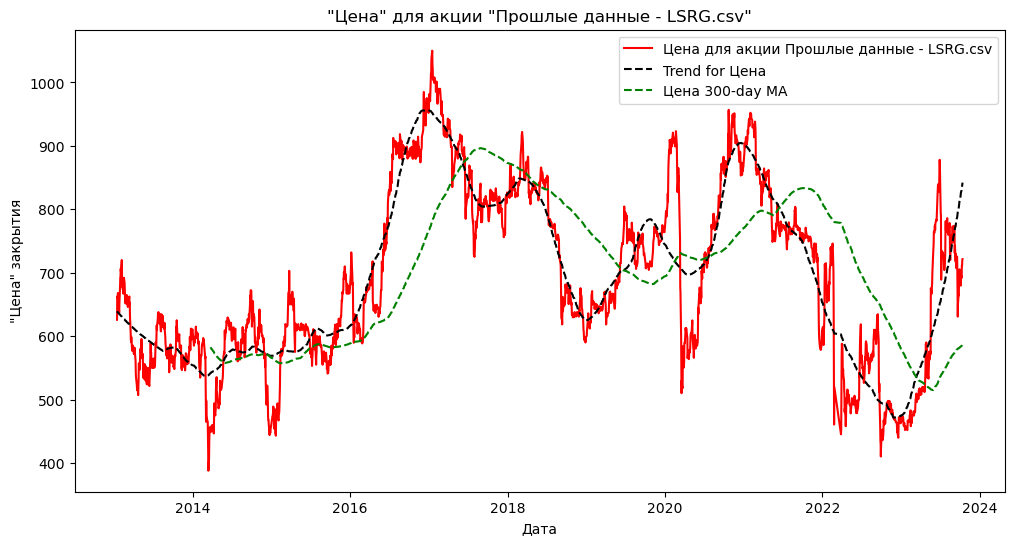

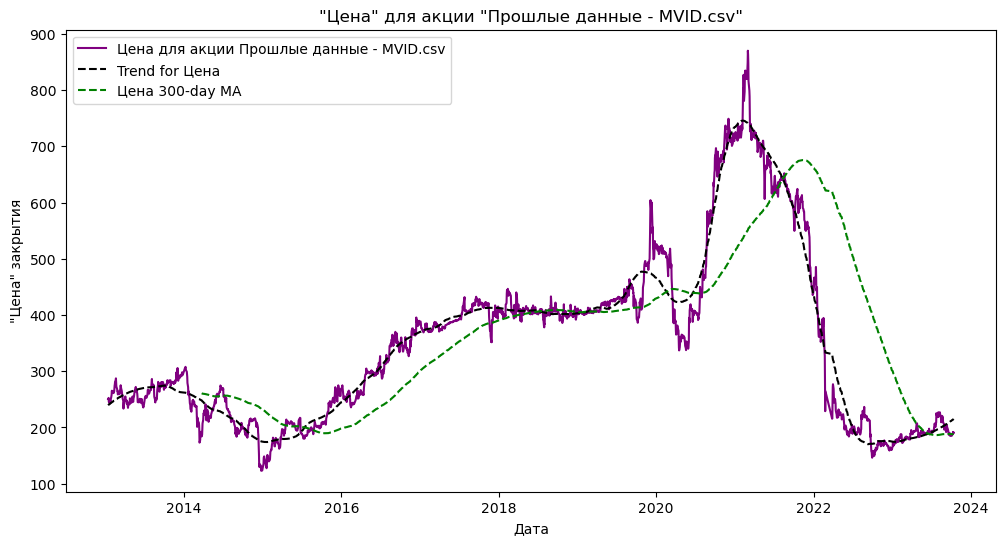

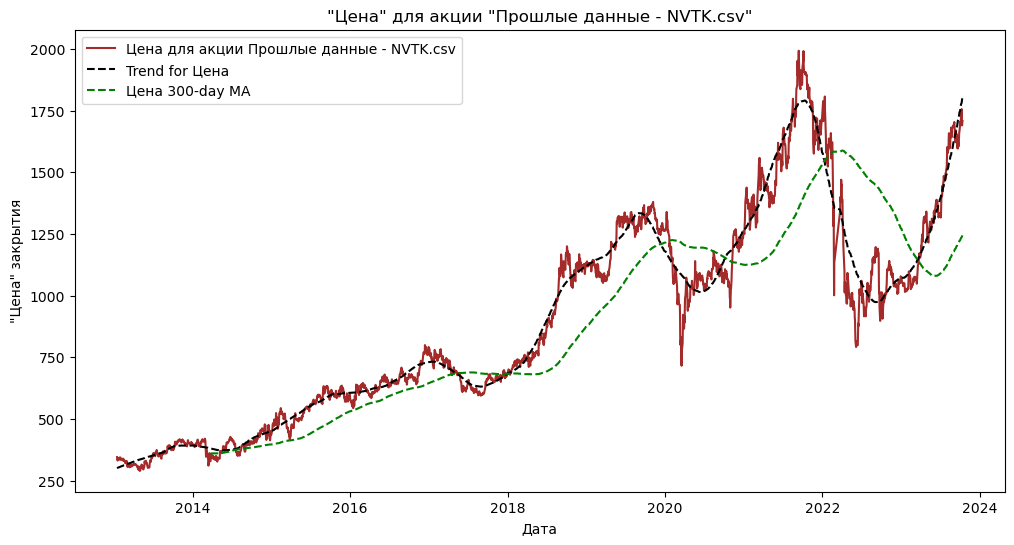

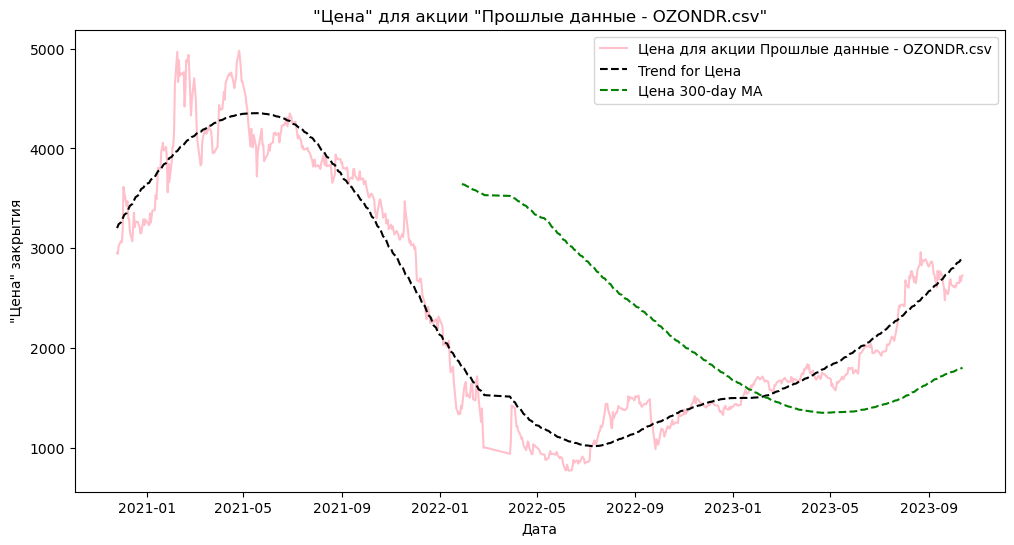

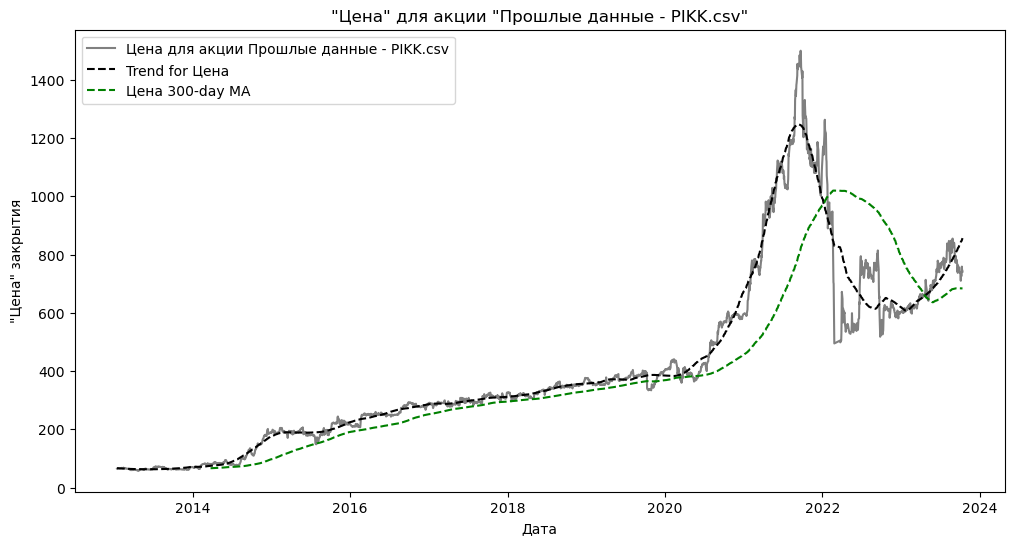

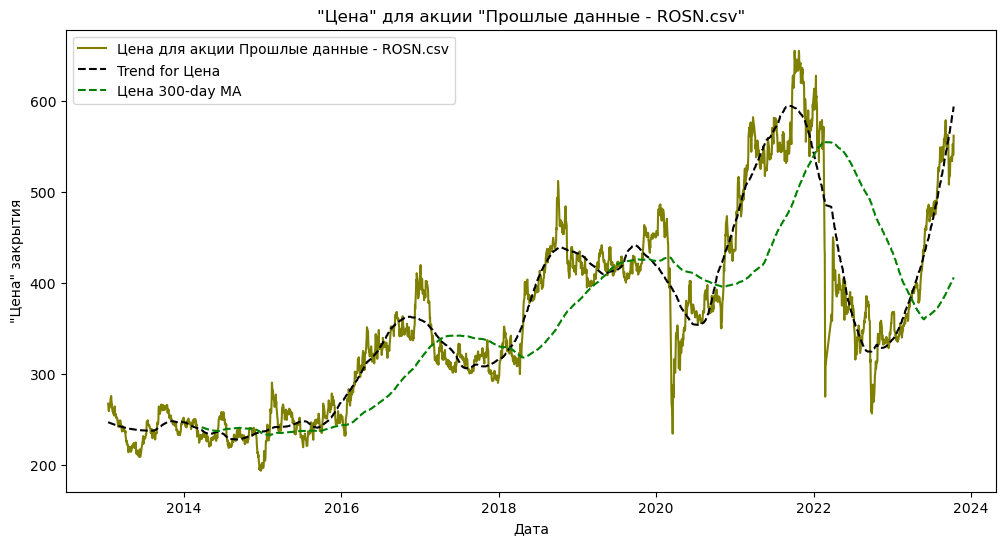

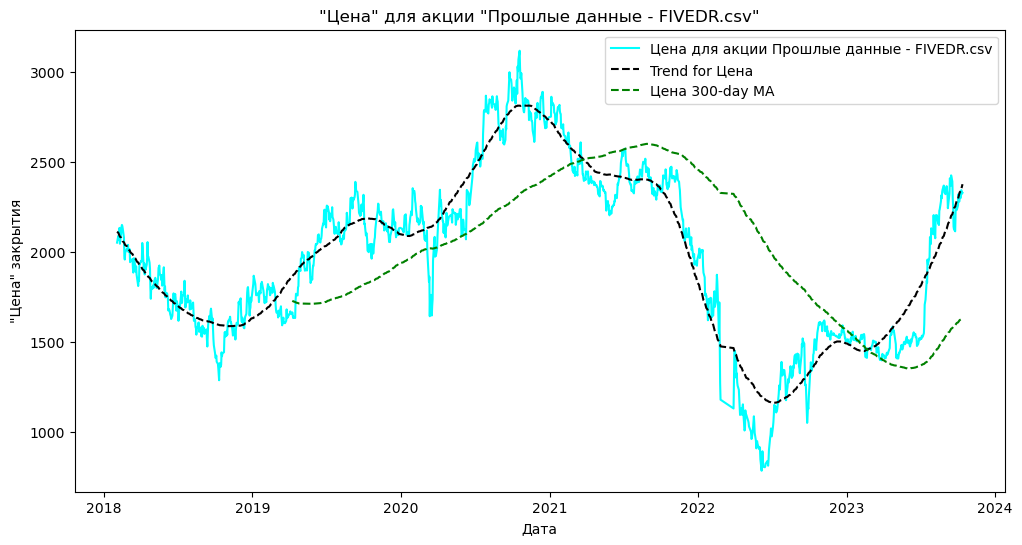

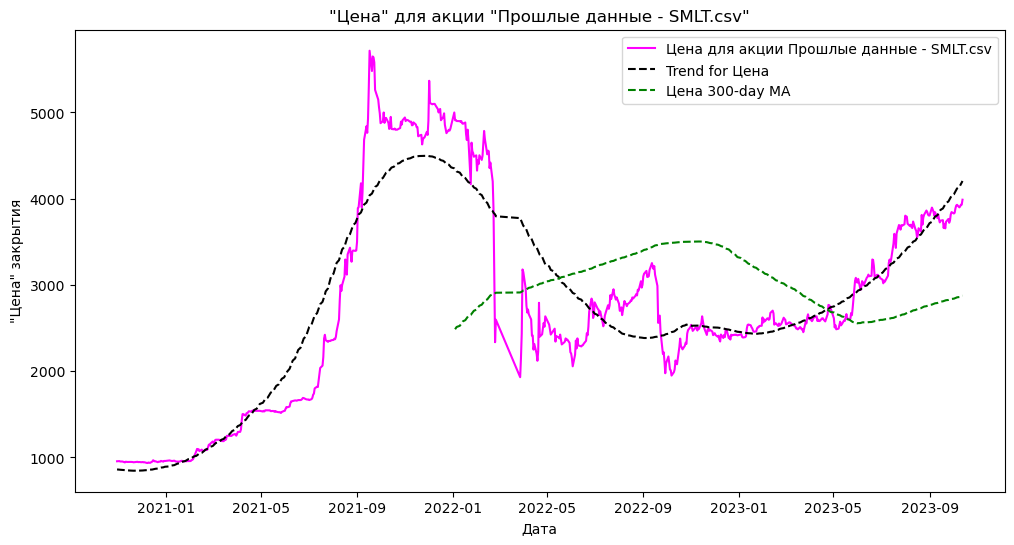

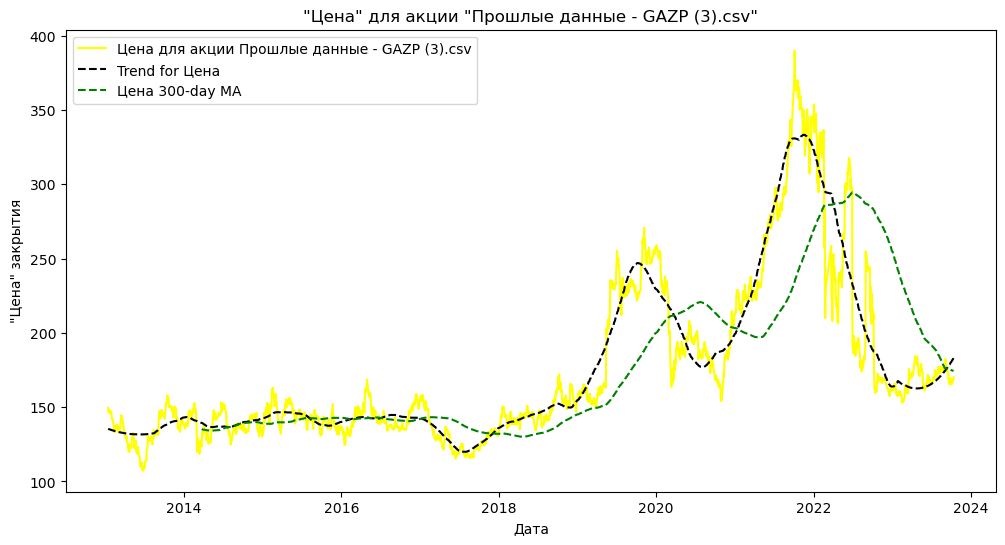

In [80]:
plot_closing_prices(file_names,column_name='Цена', plot_trend=True, plot_moving_average=True,trend_window_length=300, moving_avg_window=300)

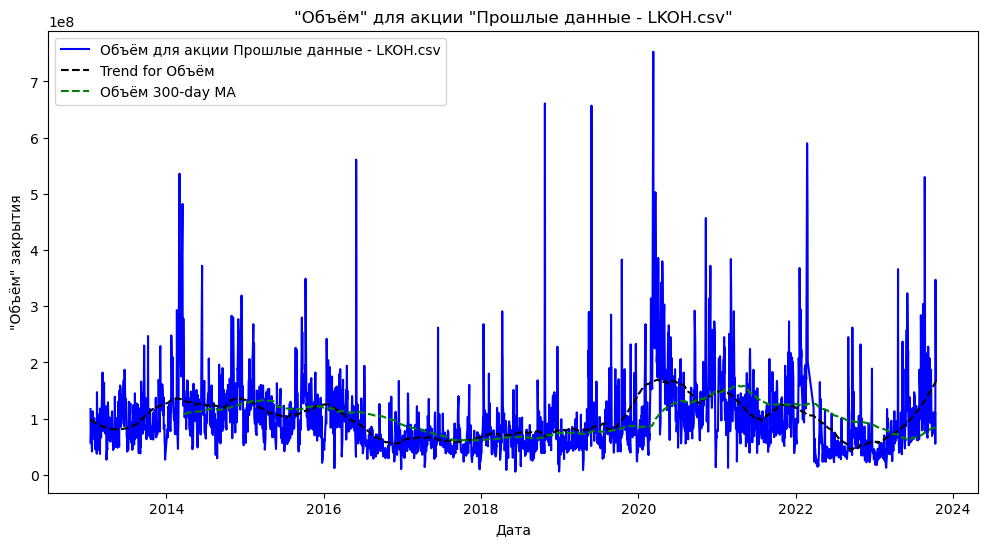

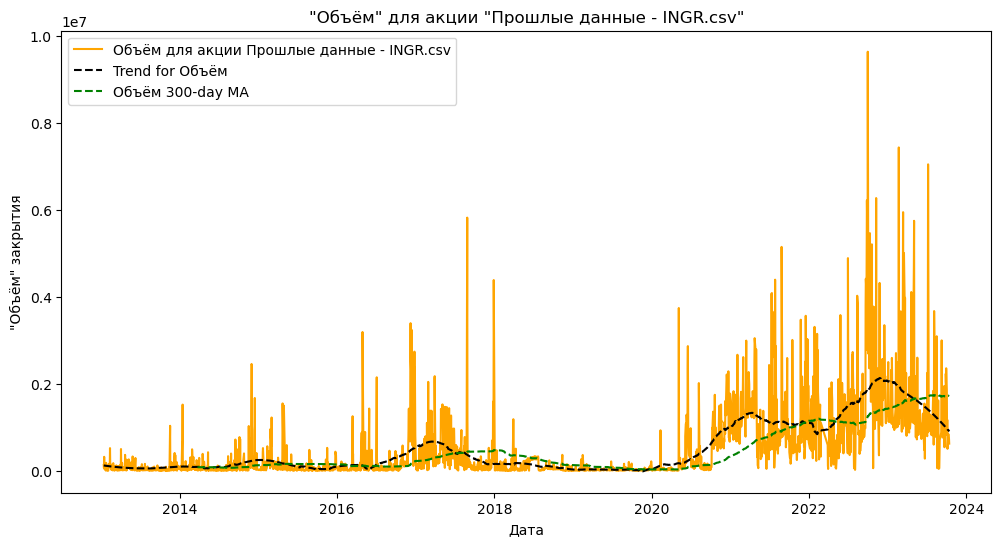

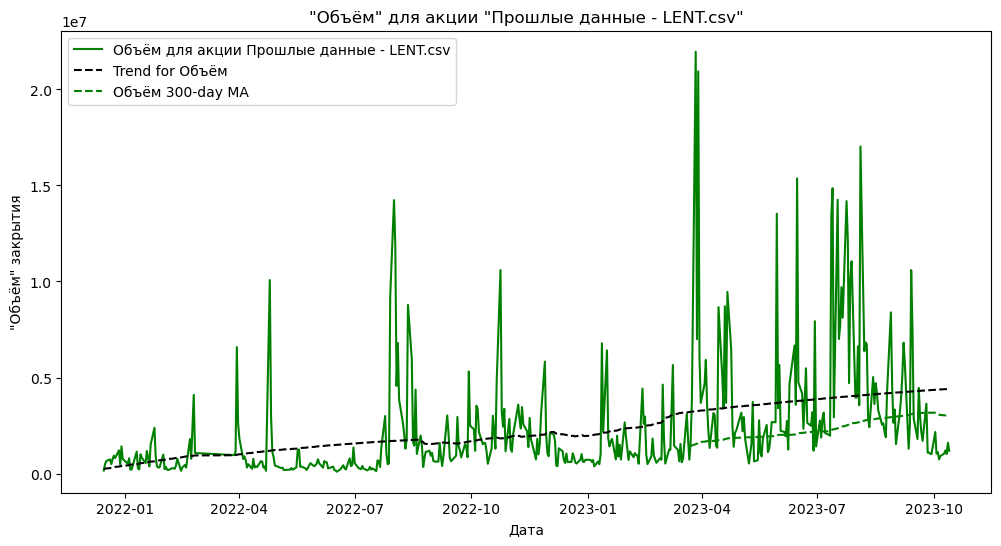

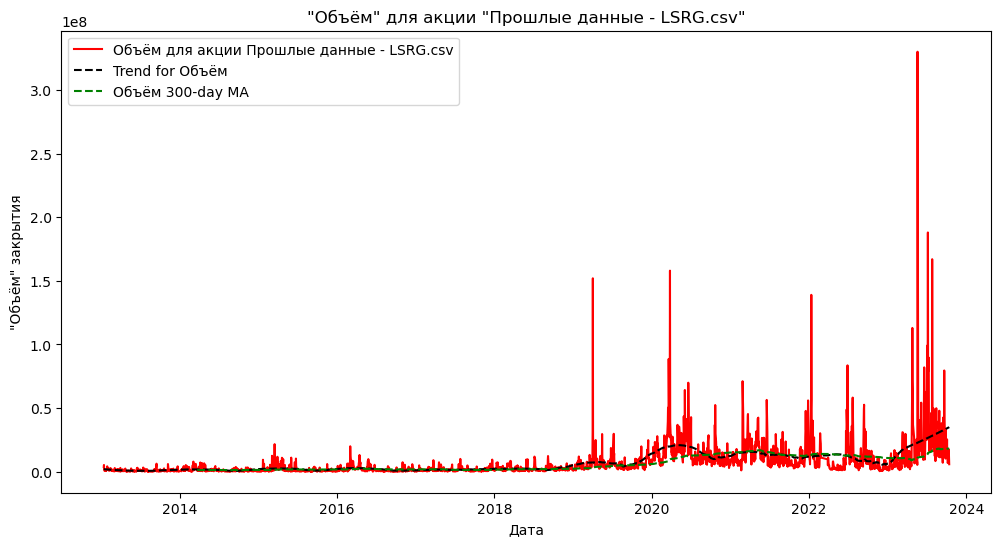

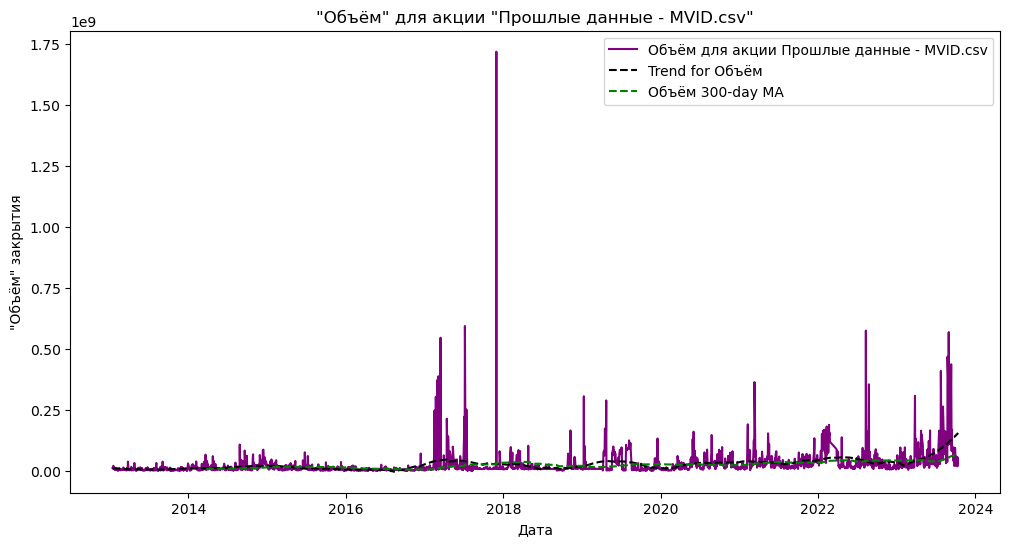

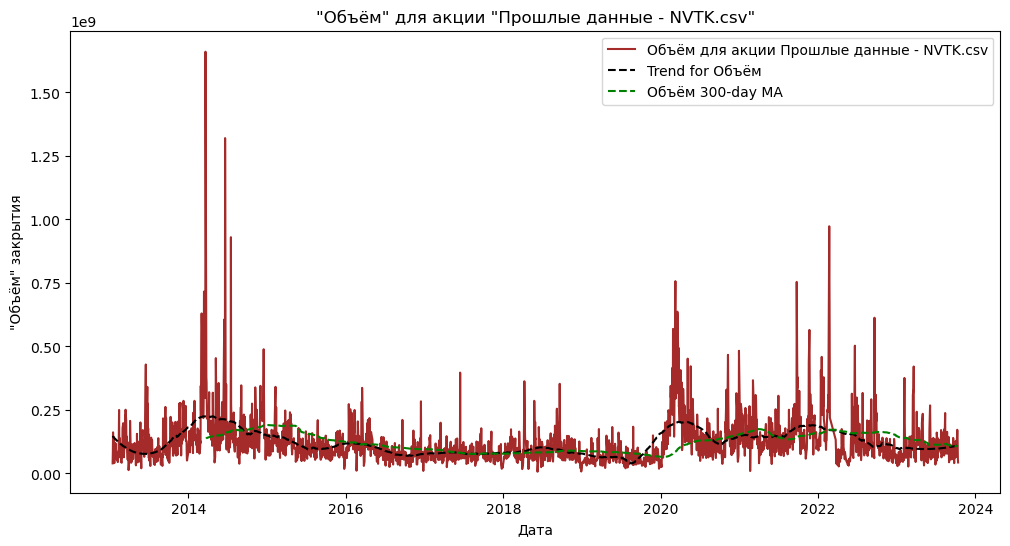

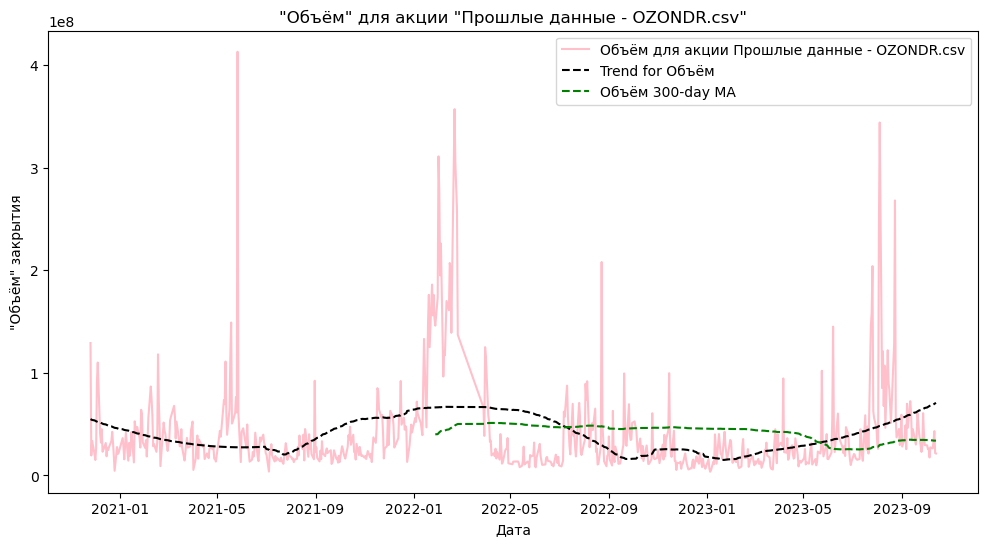

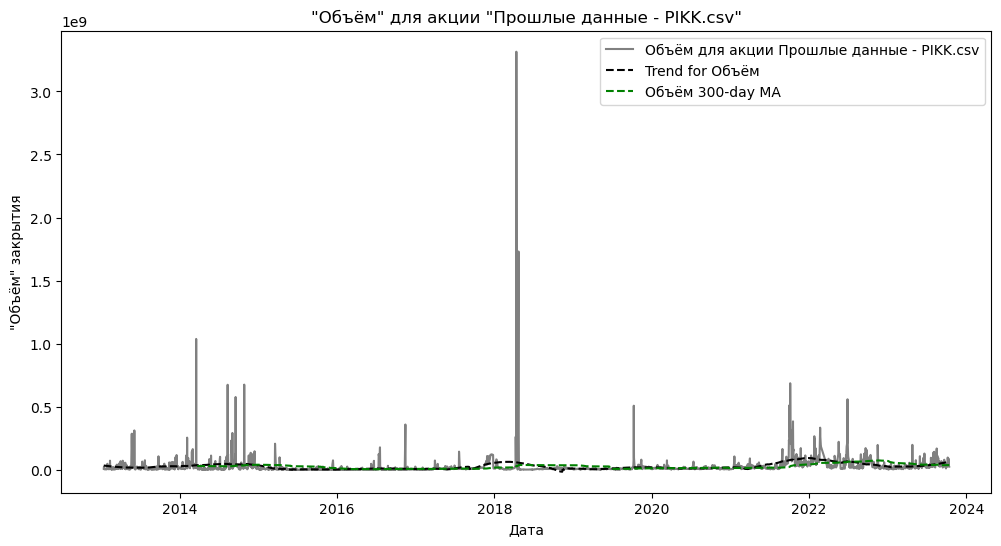

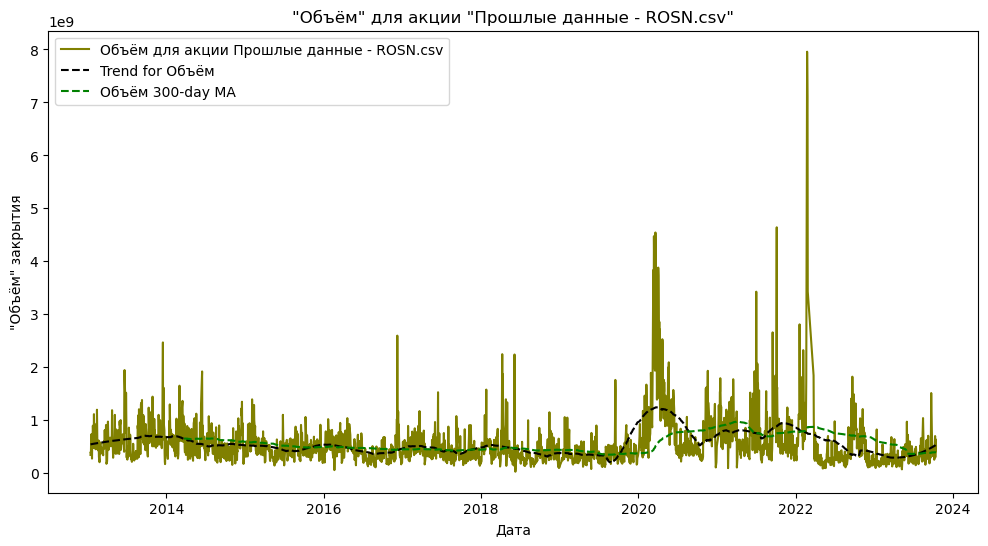

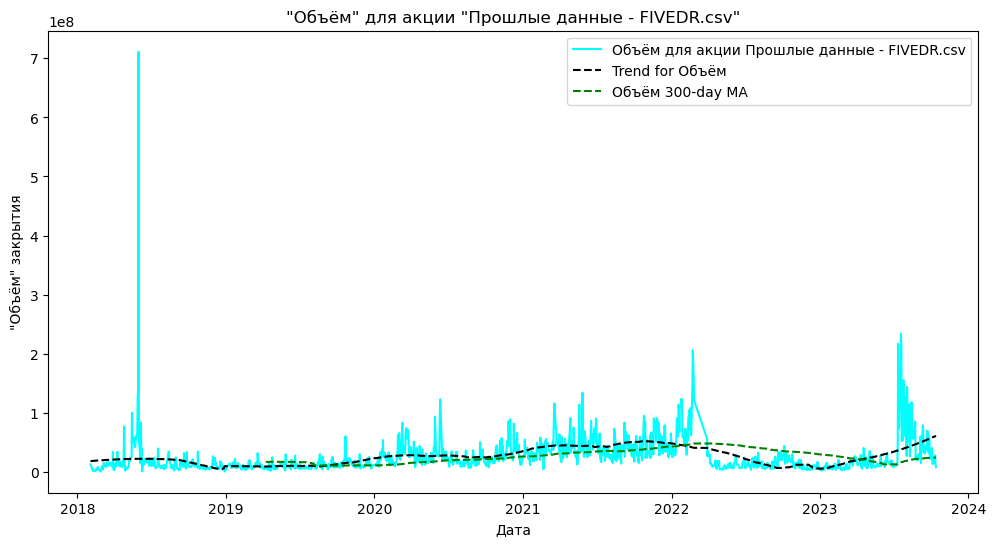

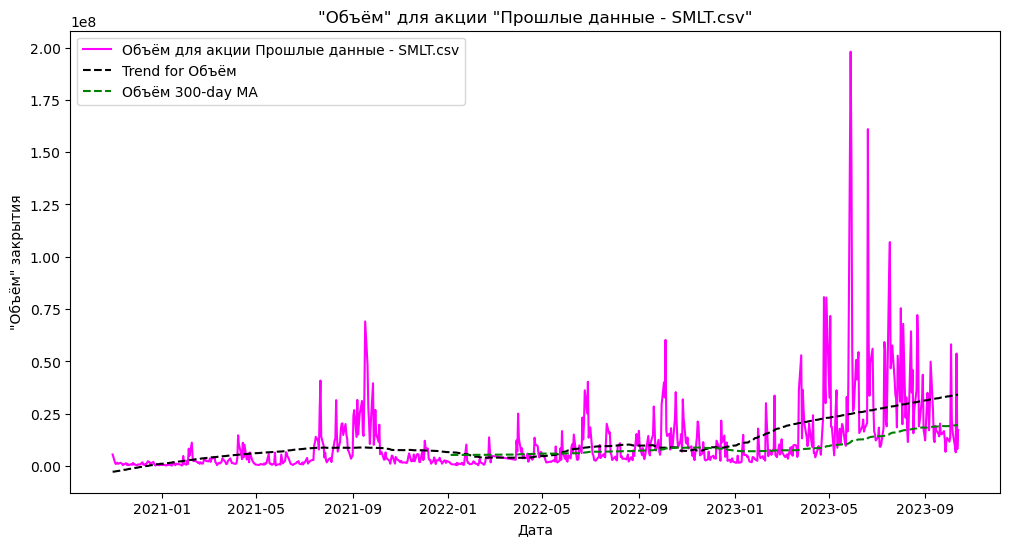

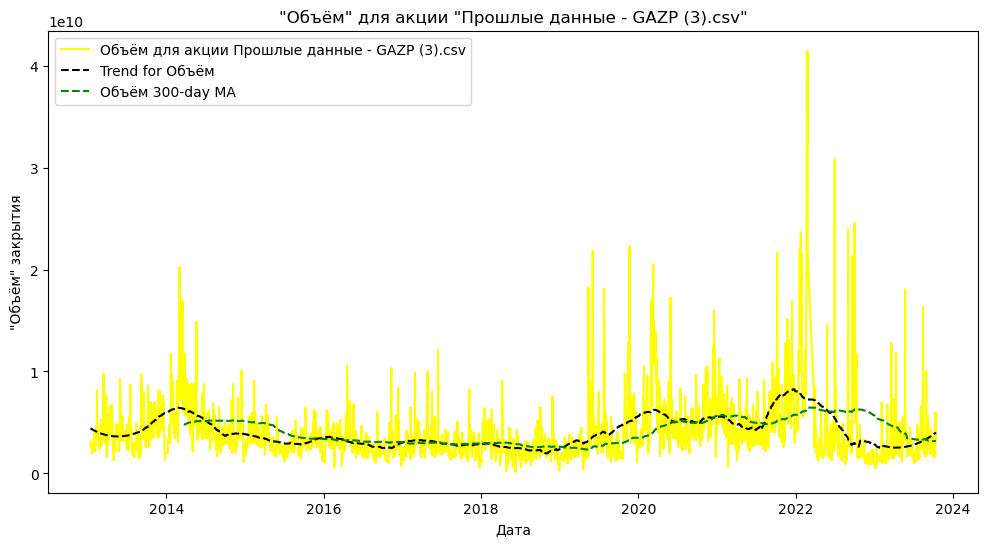

In [78]:
plot_closing_prices(file_names,column_name='Объём', plot_trend=True, plot_moving_average=True,trend_window_length=300, moving_avg_window=300)